Pixel 354430.0_5205300.0 has not enough observations (less then 4)
12 pixels have been generated


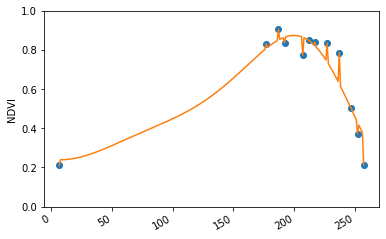

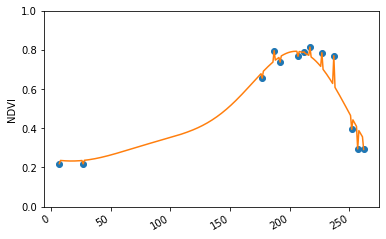

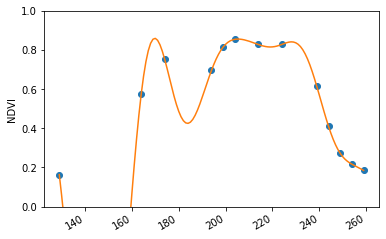

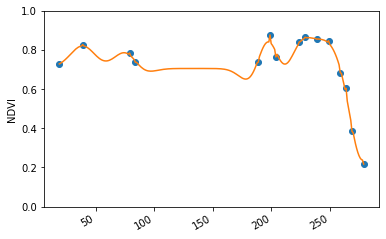

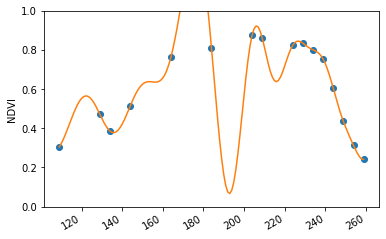

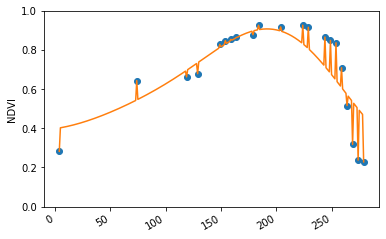

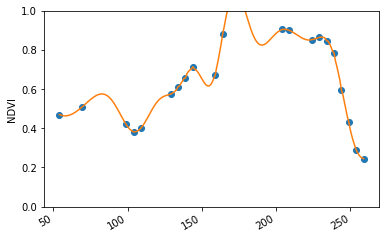

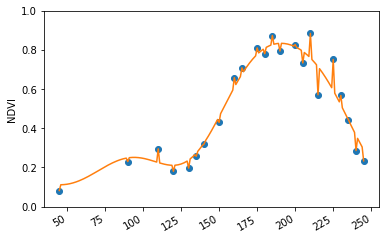

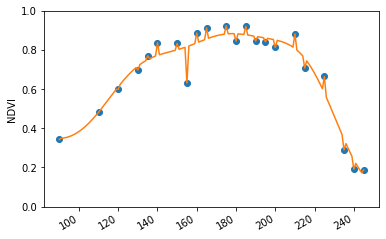

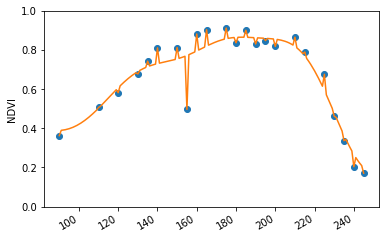

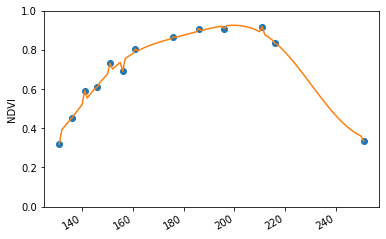

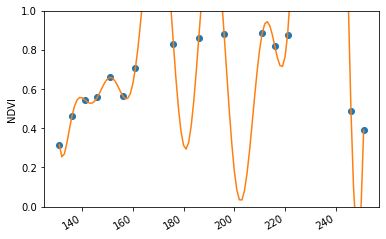

In [2]:
import os
import sys
import numpy as np
import importlib
import matplotlib.pyplot as plt
while "methods" in os.getcwd():
    os.chdir("..")
sys.path.append(os.getcwd())
import my_utils.cv as cv
import my_utils.data_handle as data_handle
import my_utils.pixel as pixel

importlib.reload(data_handle)  # get changes in my_utils.pixel
importlib.reload(pixel)  # get changes in my_utils.pixel
importlib.reload(cv)  # get changes in my_utils.pixel

np.random.seed(123)
pixels = data_handle.get_pixels(0.0008)
for pix in pixels:
    pix.plot_ndvi()
    obj, ok = pix.get_ordinary_kriging(ok_args={"variogram_model": "gaussian"})
                             # [psill, range, nugget]
    pix.plot_step_interpolate("OK")
    plt.show()
    # print(ok.variogram_model_parameters)


In [6]:
pixels2 = data_handle.get_pixels(0.01)
param_list = []
for pix in pixels2:
    obj, ok = pix.get_ordinary_kriging(ok_args={"variogram_model": "gaussian"})
    # # [psill, range, nugget]
    param_list.append(ok.variogram_model_parameters)
A = np.array(param_list)
parameter = np.median(A, axis=0)
print(f"\nMedian parameter:\n {parameter}")

Pixel 354520.0_5205330.0 has not enough observations (less then 4)
Pixel 354330.0_5205590.0 has not enough observations (less then 4)
Pixel 354400.0_5205480.0 has not enough observations (less then 4)
Pixel 354360.0_5205150.0 has not enough observations (less then 4)
Pixel 353120.0_5203700.0 has not enough observations (less then 4)
Pixel 354260.0_5205370.0 has not enough observations (less then 4)
Pixel 354380.0_5205500.0 has not enough observations (less then 4)
Pixel 354240.0_5205390.0 has not enough observations (less then 4)
Pixel 354360.0_5205160.0 has not enough observations (less then 4)
Pixel 354290.0_5205250.0 has not enough observations (less then 4)
Pixel 354490.0_5205360.0 has not enough observations (less then 4)
Pixel 354290.0_5205400.0 has not enough observations (less then 4)
Pixel 354480.0_5205300.0 has not enough observations (less then 4)
149 pixels have been generated

Median parameter:
 [6.20995912e-02 5.44225353e+01 2.41905914e-03]


Pixel 354430.0_5205300.0 has not enough observations (less then 4)
12 pixels have been generated


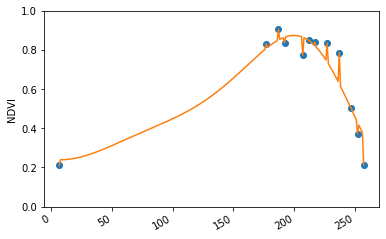

[1.29881772e-01 1.08655470e+02 2.07069634e-02]


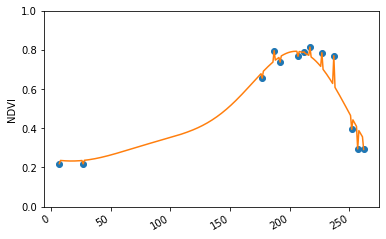

[8.85299869e-02 1.13819883e+02 2.05214382e-02]


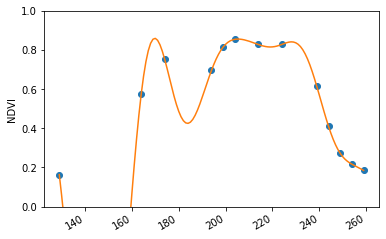

[9.53127072e-02 4.14955192e+01 9.62466717e-15]


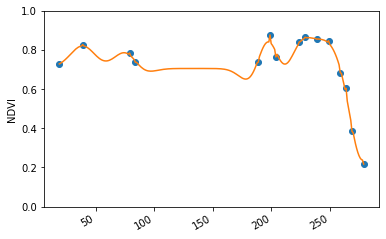

[3.24643998e-02 2.57388659e+01 1.93249765e-03]


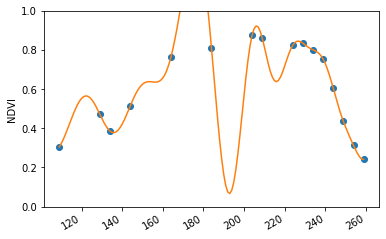

[5.76397767e-02 2.94891421e+01 2.55242650e-15]


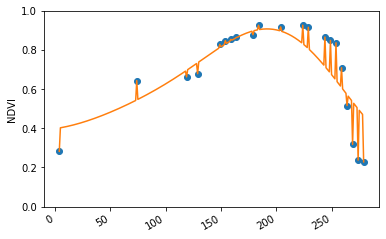

[5.65133303e-02 1.74330897e+02 3.45996618e-02]


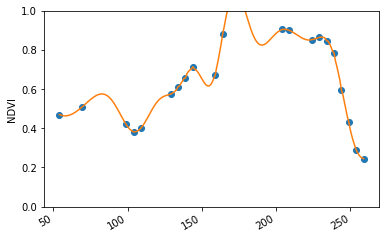

[4.54398856e-02 2.70418968e+01 1.87176643e-04]


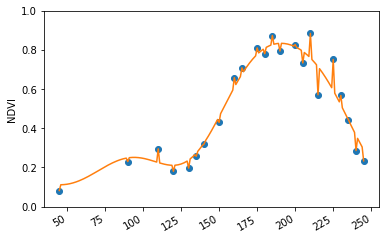

[9.27461672e-02 7.35426303e+01 1.25891248e-02]


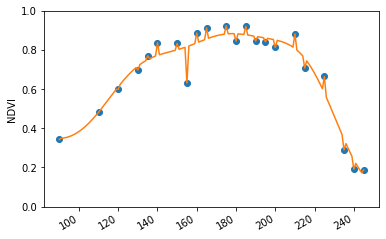

[7.45775196e-02 6.04382930e+01 2.98314774e-03]


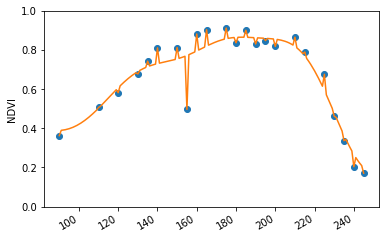

[5.80640852e-02 5.41186009e+01 9.24346159e-03]


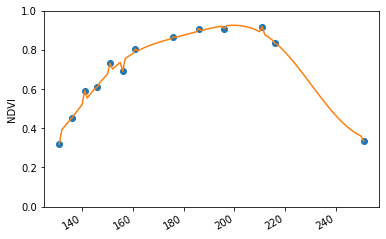

[6.45212304e-02 5.54193385e+01 4.44988442e-03]


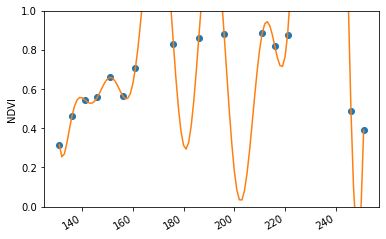

[4.64207786e-02 3.90342957e+01 2.32330254e-20]


In [7]:
np.random.seed(123)
pixels = data_handle.get_pixels(0.0008)
for pix in pixels:
    pix.plot_ndvi()
    obj, ok = pix.get_ordinary_kriging(ok_args={"variogram_model": "gaussian"})
    # [psill, range, nugget]
    pix.plot_step_interpolate("OK")
    plt.show()
    print(ok.variogram_model_parameters)

In [8]:
def plot_kriging_param(pix, psill, range, nugget):
    pix.plot_ndvi()
    name = "OK_"+str(psill)+"_"+str(range)+"_"+str(nugget)
    pix.get_ordinary_kriging(name=name, ok_args={"variogram_model": "gaussian", "variogram_parameters": [
                             psill, range, nugget]})  # [psill, range, nugget]
    pix.plot_step_interpolate(name) 

pix = pixels[6]

Interpolation with kriging

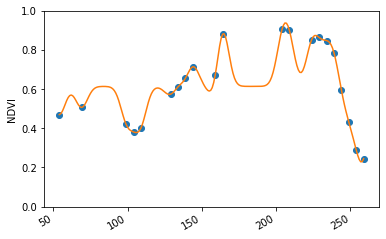

In [9]:
plot_kriging_param(pix, 10,10,0)

add nugget (assume noisy observations)

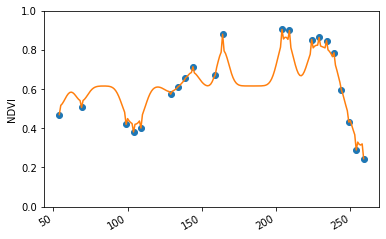

In [10]:
plot_kriging_param(pix, 10,10,3)

==> observe regression the the mean

increase range (more points influence estimation - more smooth - less "regression to the mean")

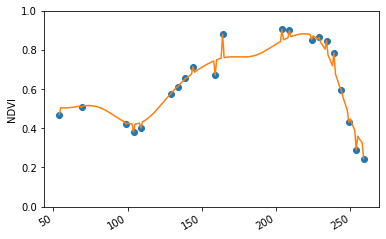

In [11]:
plot_kriging_param(pix,10, 40,3)

4


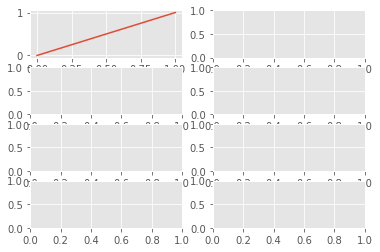

In [220]:
fig, axes = plt.subplots(4, 2)
print(len(axes))
axes[0][0].plot([0, 1], [0, 1])
ax = axes[0][0]

Example from Webpage:

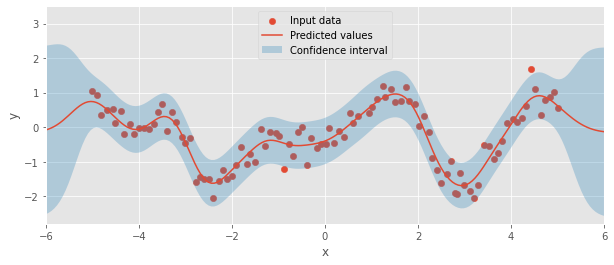

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pykrige import OrdinaryKriging

# plt.style.use("ggplot")

# # fmt: off
# # Data taken from
# # https://blog.dominodatalab.com/fitting-gaussian-process-models-python/
# X, y = np.array([
#      [-5.01, 1.06], [-4.90, 0.92], [-4.82, 0.35], [-4.69, 0.49], [-4.56, 0.52],
#      [-4.52, 0.12], [-4.39, 0.47], [-4.32,-0.19], [-4.19, 0.08], [-4.11,-0.19],
#      [-4.00,-0.03], [-3.89,-0.03], [-3.78,-0.05], [-3.67, 0.10], [-3.59, 0.44],
#      [-3.50, 0.66], [-3.39,-0.12], [-3.28, 0.45], [-3.20, 0.14], [-3.07,-0.28],
#      [-3.01,-0.46], [-2.90,-0.32], [-2.77,-1.58], [-2.69,-1.44], [-2.60,-1.51],
#      [-2.49,-1.50], [-2.41,-2.04], [-2.28,-1.57], [-2.19,-1.25], [-2.10,-1.50],
#      [-2.00,-1.42], [-1.91,-1.10], [-1.80,-0.58], [-1.67,-1.08], [-1.61,-0.79],
#      [-1.50,-1.00], [-1.37,-0.04], [-1.30,-0.54], [-1.19,-0.15], [-1.06,-0.18],
#      [-0.98,-0.25], [-0.87,-1.20], [-0.78,-0.49], [-0.68,-0.83], [-0.57,-0.15],
#      [-0.50, 0.00], [-0.38,-1.10], [-0.29,-0.32], [-0.18,-0.60], [-0.09,-0.49],
#      [0.03 ,-0.50], [0.09 ,-0.02], [0.20 ,-0.47], [0.31 ,-0.11], [0.41 ,-0.28],
#      [0.53 , 0.40], [0.61 , 0.11], [0.70 , 0.32], [0.94 , 0.42], [1.02 , 0.57],
#      [1.13 , 0.82], [1.24 , 1.18], [1.30 , 0.86], [1.43 , 1.11], [1.50 , 0.74],
#      [1.63 , 0.75], [1.74 , 1.15], [1.80 , 0.76], [1.93 , 0.68], [2.03 , 0.03],
#      [2.12 , 0.31], [2.23 ,-0.14], [2.31 ,-0.88], [2.40 ,-1.25], [2.50 ,-1.62],
#      [2.63 ,-1.37], [2.72 ,-0.99], [2.80 ,-1.92], [2.83 ,-1.94], [2.91 ,-1.32],
#      [3.00 ,-1.69], [3.13 ,-1.84], [3.21 ,-2.05], [3.30 ,-1.69], [3.41 ,-0.53],
#      [3.52 ,-0.55], [3.63 ,-0.92], [3.72 ,-0.76], [3.80 ,-0.41], [3.91 , 0.12],
#      [4.04 , 0.25], [4.13 , 0.16], [4.24 , 0.26], [4.32 , 0.62], [4.44 , 1.69],
#      [4.52 , 1.11], [4.65 , 0.36], [4.74 , 0.79], [4.84 , 0.87], [4.93 , 1.01],
#      [5.02 , 0.55]
# ]).T
# # fmt: on

# X_pred = np.linspace(-6, 6, 200)

# # pykrige doesn't support 1D data for now, only 2D or 3D
# # adapting the 1D input to 2D
# uk = OrdinaryKriging(X, np.zeros(X.shape), y, variogram_model="gaussian")

# y_pred, y_std = uk.execute("grid", X_pred, np.array([0.0]))

# y_pred = np.squeeze(y_pred)
# y_std = np.squeeze(y_std)

# y_std

# fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# ax.scatter(X, y, s=40, label="Input data")


# ax.plot(X_pred, y_pred, label="Predicted values")
# ax.fill_between(
#     X_pred,
#     y_pred - 3 * y_std,
#     y_pred + 3 * y_std,
#     alpha=0.3,
#     label="Confidence interval",
# )
# ax.legend(loc=9)
# ax.set_xlabel("x")
# ax.set_ylabel("y")
# ax.set_xlim(-6, 6)
# ax.set_ylim(-2.8, 3.5)
# plt.show()